# RED & WHITE WINE QUALITY PREDICTION

PARTICIPANTI

OBREJA CORINA DENISA 

STROIE FABIANA GEORGIANA  

URSULACHE COSMIN 

La acest proiect am contribuit impreuna, intalnindu-ne, facand research si implementand rezolvarile acestor seturi de date.

--------------------------------------------------------------------------------------------------------

Am primit 2 seturi de date, unul pentru vinul rosu si unul pentru vinul alb, pe care vom incerca sa analizam si sa exploatam datele prezentate.

Ne-am hotarat sa analizam si sa preparam aceste 2 seturi de date separat, iar apoi sa le combinam, pentru a putea face o analiza mai in ansamblu.

Pasii pentru a analiza si exploata datele sunt

~Obtinerea de date din seturile avute la dispozitie

~Curatarea, prepararea si manipularea datelor

~Training the model

~Test the data

~Data interpretation

Vom importa toate librariile necesare pentru crearea acestui proiect:

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# GET DATA FOR THE RED WINE

Prin pd.read_csv(#dataset) vom importa setul de date in proiect
Am ales sa denumesc acest dataframe redWine, pentru a distinge datasetul vin rosu de datasetul vin alb.

.describe() - aceasta functie descrie suma tuturor coloanelor, media, deviatia standard (radacina patrata din valoarea variatiei), minimul si maximul fiecarei coloane.

In [125]:
redWine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
redWine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

.info() - aceasta functie ne arata ce tip de data are fiecare coloana. Dupa cum se poate observa, avem 11 coloane tip float si 1 coloana tip int.

In [126]:
redWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Prin index = df.index si number_of_rows = len(index), vom afisa separat de functia info cate elemente exista in acest set, inainte de a sterge randurile duplicate.

In [127]:
index = redWine.index
number_of_rows = len(index)
print("Number of rows before dropping duplicates: ", number_of_rows)

Number of rows before dropping duplicates:  1599


.head() afiseaza primele 5 randuri din df. Putem modifica acest lucru, scriind orice numar intreg intre paranteze. ex: .head(10)

In [128]:
redWine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# CLEAN, PREPARE & MANIPULATE DATA FOR THE RED WINE

.isnull() - verifica daca df are elemente lipsa

.sum() - numarul de elemente lipsa

Nu exista elemente lipsa.

In [129]:
redWine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

.duplicated() - afiseaza daca avem duplicate

In [131]:
redWine.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

.drop_duplicates() - sterge duplicatele

In [132]:
newRedWine = redWine.drop_duplicates()

Afisam din nou informatiile despre df, pentru a vedea cate randuri au ramas

In [133]:
newRedWine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


Afisam cate elemente au ramas dupa stergerea duplicatelor.

In [160]:
index1 = newRedWine.index
number_of_rows1 = len(index1)
print("Number of rows after dropping duplicates: ", number_of_rows1)

Number of rows after dropping duplicates:  1359


Vom arata cate elemente au fost sterse:

In [136]:
differenceRowsAfterDroppingDuplicates = number_of_rows - number_of_rows1
print ("The difference between the number of rows before and after dropping the duplicates: ", differenceRowsAfterDroppingDuplicates)

The difference between the number of rows before and after dropping the duplicates:  240


Pentru utilizarea prealabila a metodei dummy, vom adauga o coloana numita Type, de tip string, ce va avea ca valori tipul vinului(rosu).

Metoda dummy convertește datele categoriale in variabile dummy(fictive) sau indicator. Vom vorbi despre aceasta in ansamblu mai tarziu.

In [134]:
newRedWine['Type'] = "Red Wine"
newRedWine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality      Type  
0         9.4        5  Red Wine  
1         9.8        5  Red Wine  
2         9.8        5  Red Wine  
3         9.8        6  Red Wine  
5         9.4        5  Red Wine  
...       ...      ...       ...  
1593      9.5        6  Red Wine  
1594     10.5        5  Red Wine  
1595     11.2        6  Red Wine  
1597     10.2        5  Red Wine  
1598     11.0        6  Red Wine  

[1359 rows x 13 columns]

# DATA ANALYSIS FOR THE RED WINE

Box Plot este reprezentarea vizuală a grupurilor de date numerice care reprezintă prin quartilele lor. Boxplot este, de asemenea, utilizat pentru a detecta valorile aberante din setul de date. Captează eficient rezumatul datelor cu o simplă casetă și ne permite să comparăm cu ușurință grupurile.

IndexError: index 12 is out of bounds for axis 0 with size 12

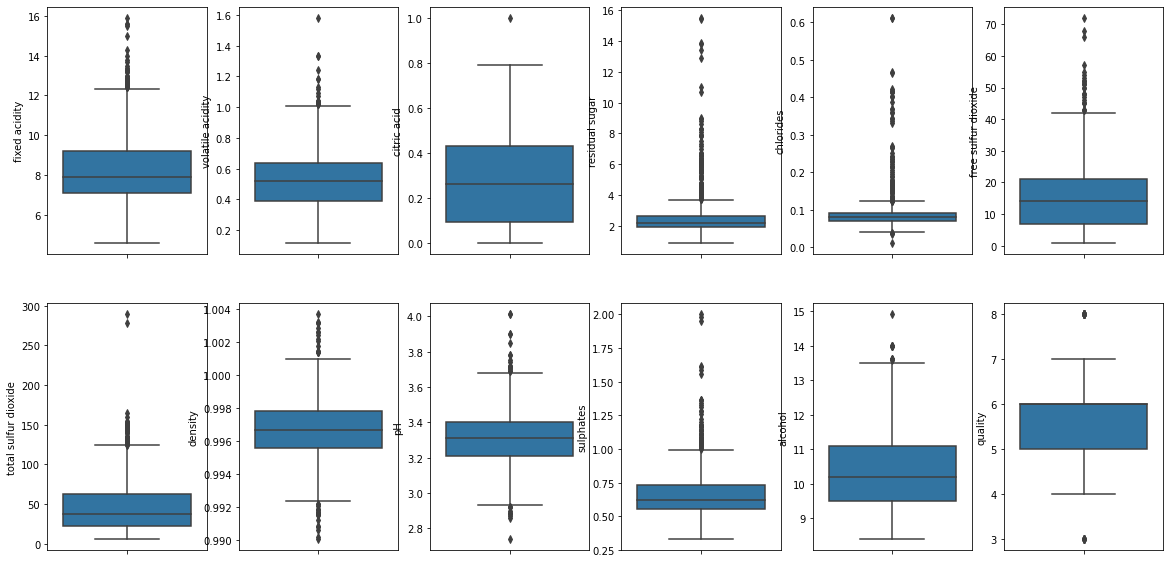

In [143]:
#boxplot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in newRedWine.items():
    sns.boxplot(y=col, data=newRedWine, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Distplot permite afisarea unei histograme cu o linie pe ea. Acest lucru poate fi arătat în tot felul de variații. Folosim seaborn în combinație cu matplotlib, modulul de plotare Python.

Un distplot prezintă o distribuție univariată a observațiilor.

IndexError: index 12 is out of bounds for axis 0 with size 12

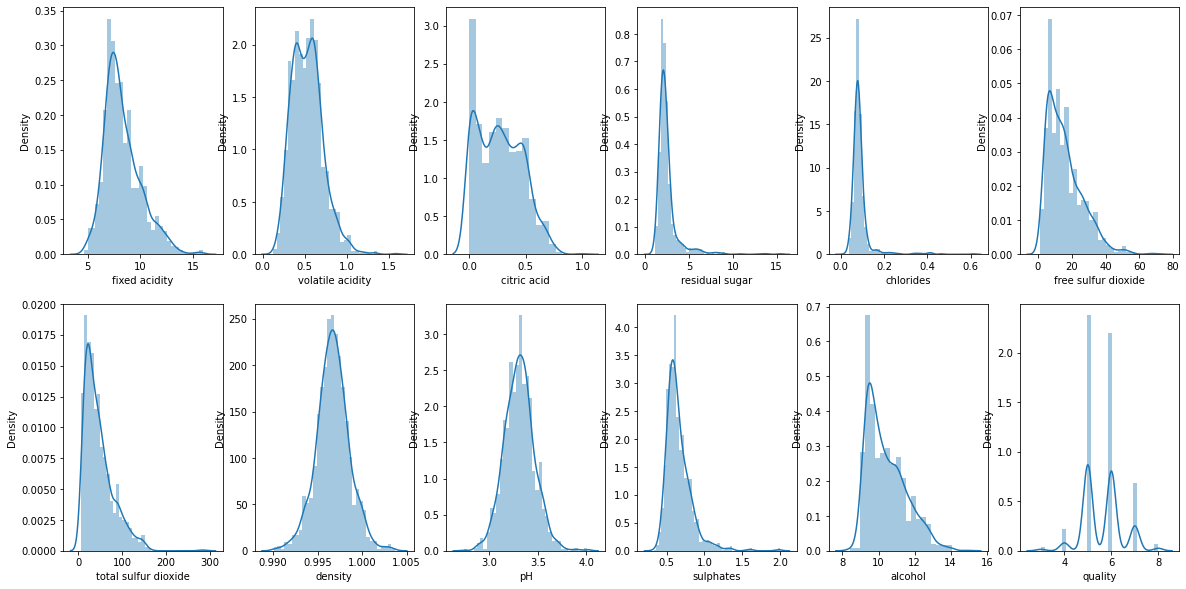

In [144]:
#distribution plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in newRedWine.items():
    sns.distplot(value, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Aici putem observa nivelele de calitate a vinurilor. Cea mai mare valoare este 5.

<AxesSubplot:xlabel='quality', ylabel='count'>

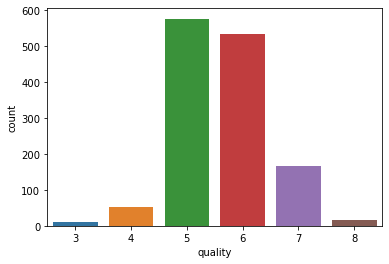

In [145]:
sns.countplot(newRedWine['quality'])

Facem o descriere a calitatii:

In [146]:
newRedWine['quality'].describe()

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Scatterplot este un tip de tehnică de vizualizare a datelor care arată relația dintre două variabile numerice. 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

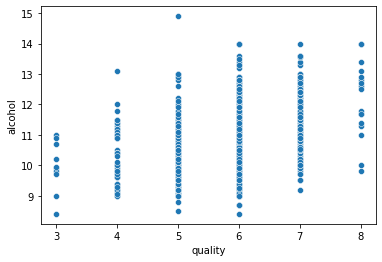

In [147]:
sns.scatterplot(x='quality', y='alcohol', data=newRedWine)

Pairplot - Pentru a reprezenta mai multe distribuții bivariate pe perechi într-un set de date, puteți utiliza funcția pairplot(). Aceasta arată relația pentru (n, 2) combinație de variabile într-un DataFrame ca o matrice de diagrame, iar diagramele diagonale sunt diagramele univariate.

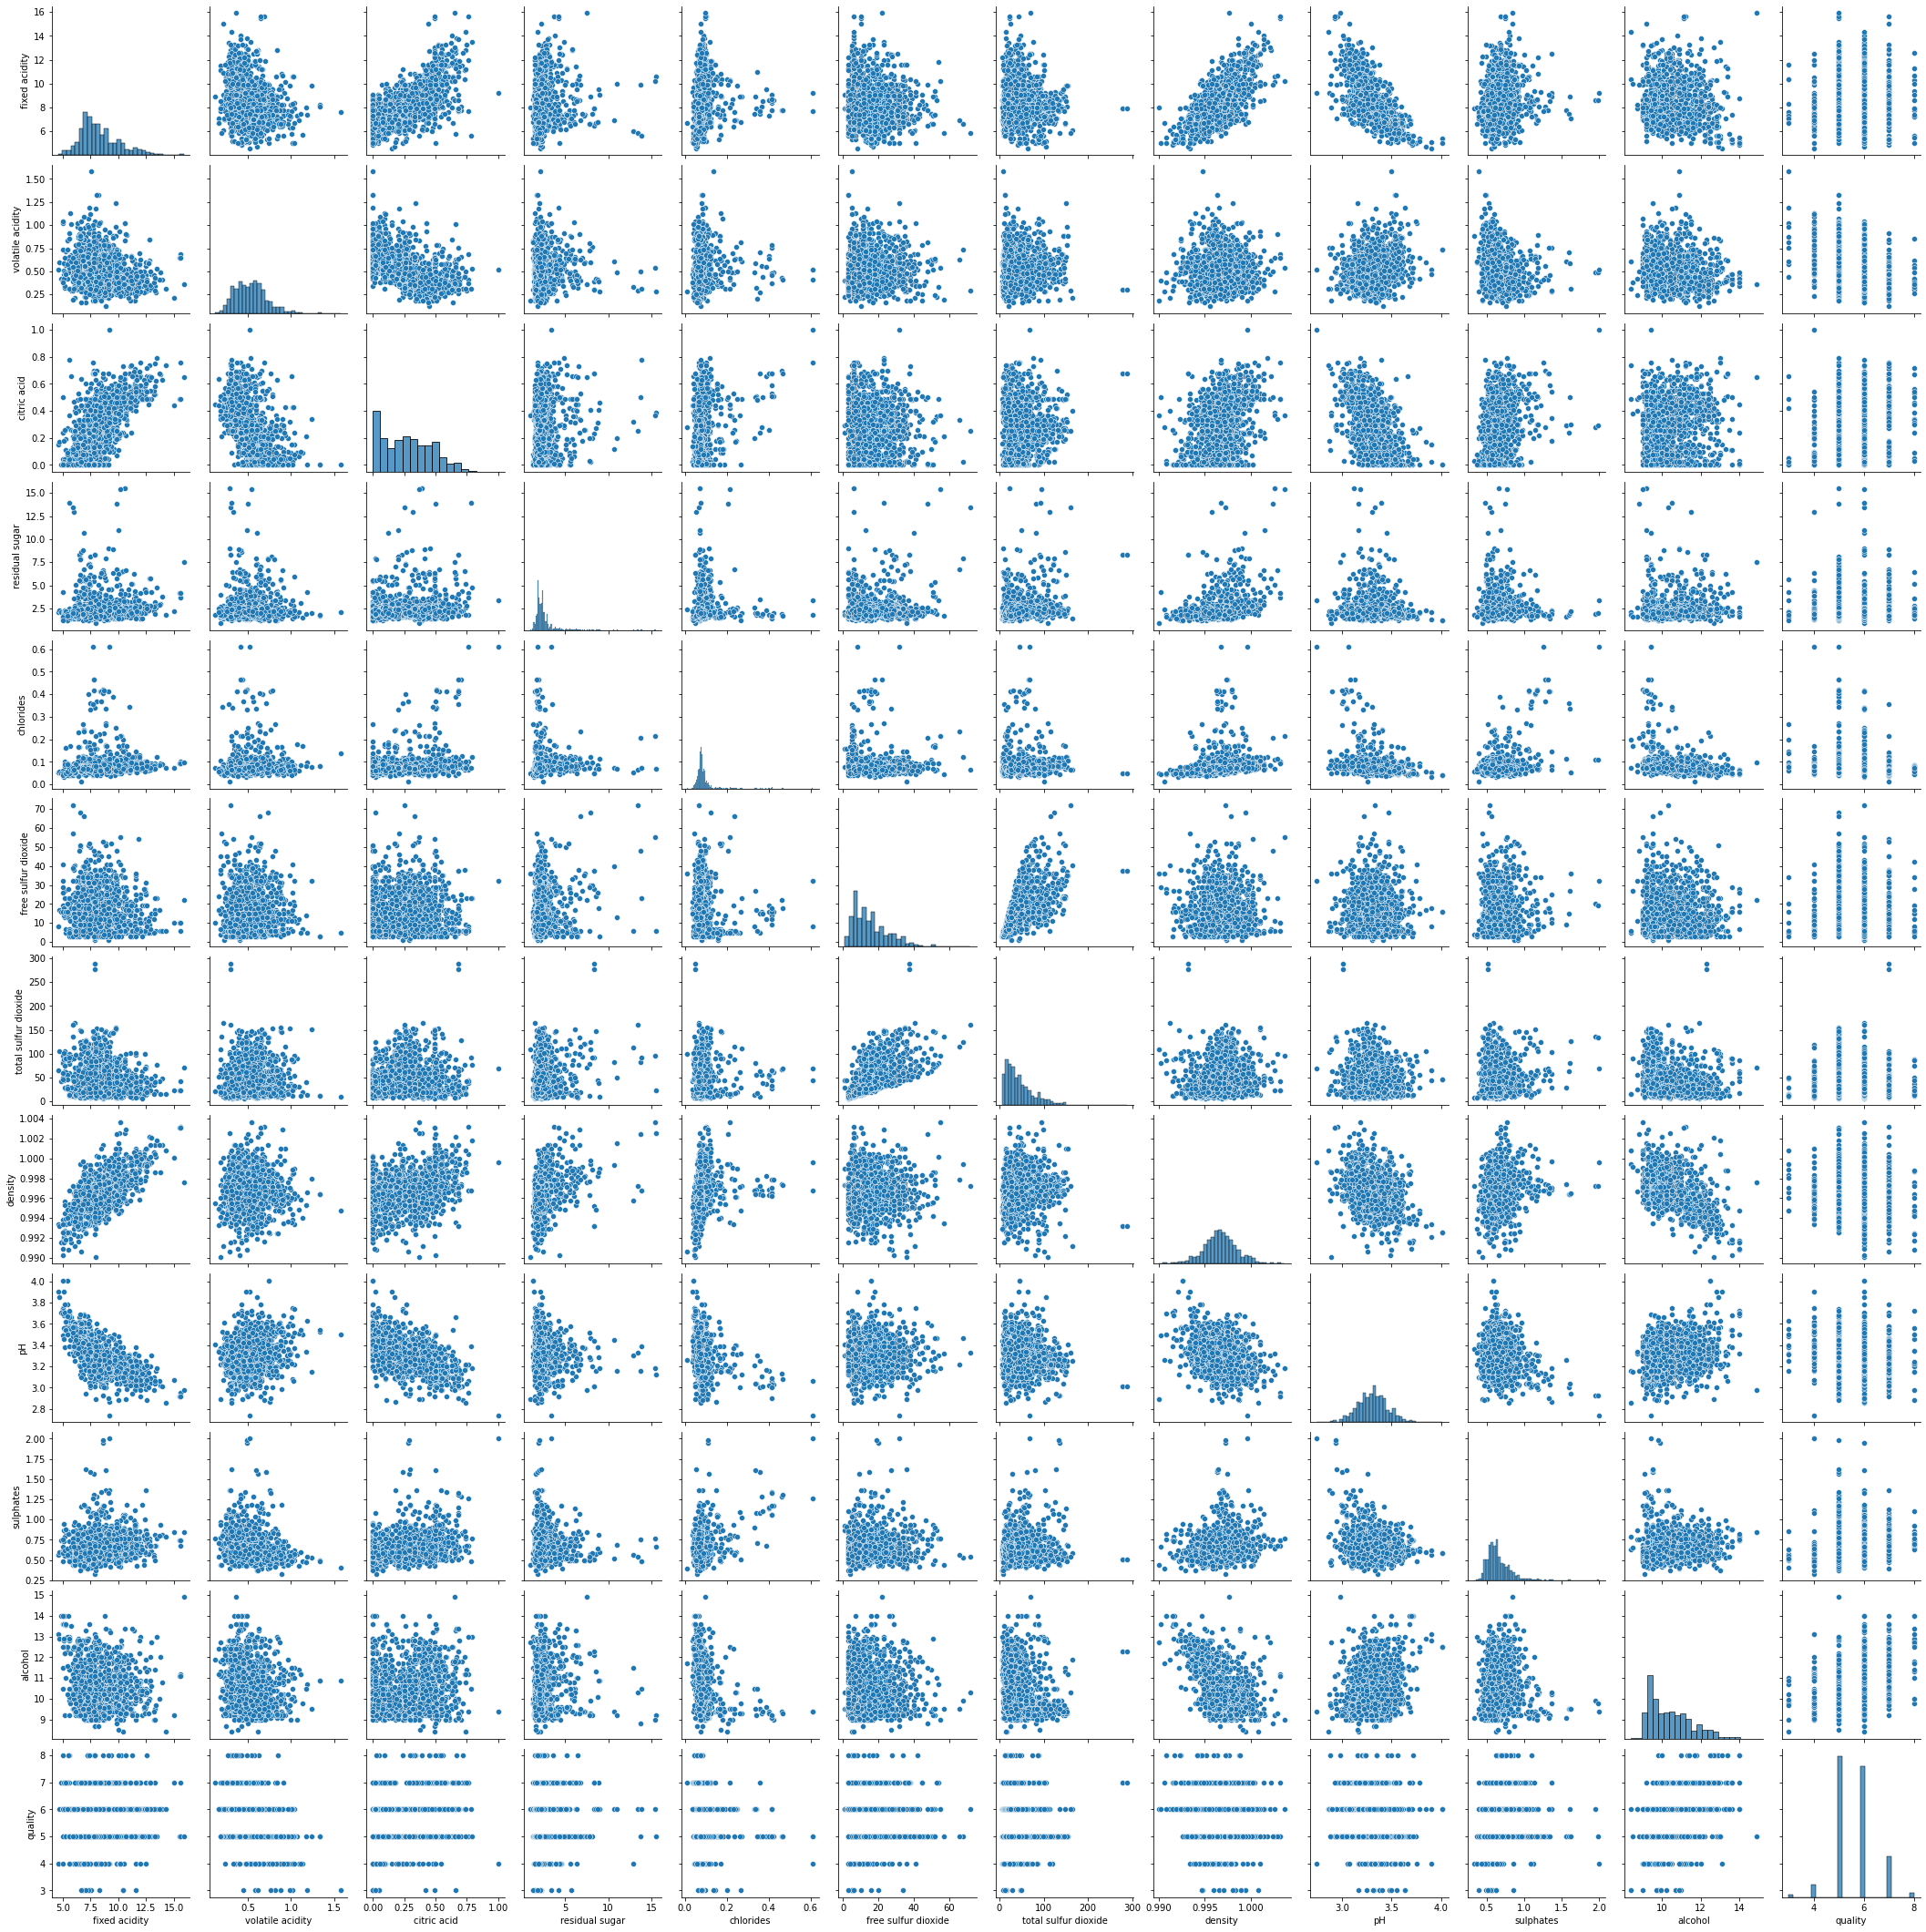

In [148]:
sns.pairplot(newRedWine)

Histograma este o reprezentare a distribuției datelor. 

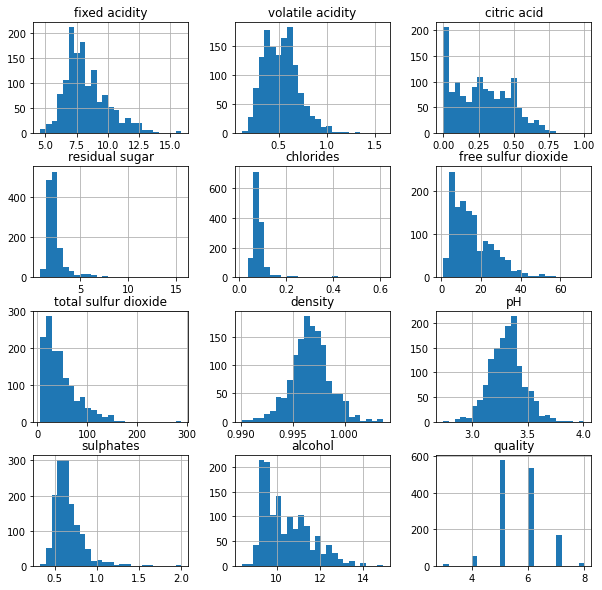

In [149]:
newRedWine.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

# CORRELATION MATRIX FOR THE RED WINE

.corr() - afiseaza o matrice de corelatii

O matrice de corelație este un tabel care arată coeficienții de corelație între variabile. Fiecare celulă din tabel arată corelația dintre două variabile. O matrice de corelație este utilizată pentru a rezuma datele, ca intrare într-o analiză mai avansată și ca diagnostic pentru analizele avansate.

+1	Complete positive correlation

+0.8	Strong positive correlation

+0.6	Moderate positive correlation

0	No correlation

-0.6	Moderate negative correlation

-0.8	Strong negative correlation

-1	Complete negative correlation

<AxesSubplot:>

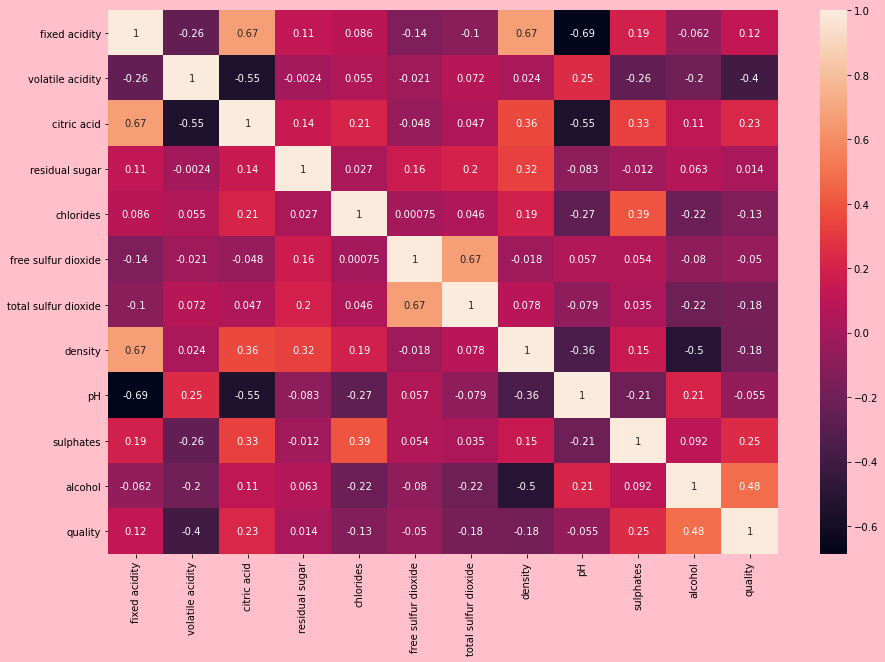

In [150]:
corr = newRedWine.corr()
plt.figure(figsize=(15,10), facecolor='pink')
sns.heatmap(corr, annot=True)

# GET DATA FOR THE WHITE WINE

Prin pd.read_csv(#dataset) vom importa setul de date in proiect
Am ales sa denumesc acest dataframe whiteWine, pentru a distinge datasetul vin rosu de datasetul vin alb.

.describe() - aceasta functie descrie suma tuturor coloanelor, media, deviatia standard (radacina patrata din valoarea variatiei), minimul si maximul fiecarei coloane.

In [75]:
whiteWine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
whiteWine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [76]:
whiteWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Avem 4898 inainte de a sterge randurile duplicate.

In [77]:
index2 = whiteWine.index
number_of_rows2 = len(index2)
print("Number of rows before dropping duplicates: ", number_of_rows2)

Number of rows before dropping duplicates:  4898


In [78]:
whiteWine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

# CLEAN, PREPARE & MANIPULATE DATA FOR THE WHITE WINE

Nu exista elemente lipsa.

In [79]:
whiteWine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [151]:
whiteWine.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 4898, dtype: bool

In [161]:
newWhiteWine = whiteWine.drop_duplicates()

In [162]:
newWhiteWine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [163]:
index3 = newWhiteWine.index
number_of_rows3 = len(index3)
print("Number of rows after dropping duplicates: ", number_of_rows3)

Number of rows after dropping duplicates:  3961


In [164]:
differenceRowsAfterDroppingDuplicates = number_of_rows2 - number_of_rows3
print ("The difference between the number of rows before and after dropping the duplicates: ", differenceRowsAfterDroppingDuplicates)

The difference between the number of rows before and after dropping the duplicates:  937


Pentru utilizarea prealabila a metodei dummy, vom adauga o coloana numita Type, de tip string, ce va avea ca valori tipul vinului(alb).

Metoda dummy convertește datele categoriale in variabile fictive sau indicator. Vom vorbi despre aceasta in ansamblu mai tarziu.

In [165]:
newWhiteWine['Type'] = "White Wine"
newWhiteWine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
6                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality        Type  
0         8.8        6  White Wine  
1         9.5        6  White Wine  
2        10.1        6  White Wine  
3         9.9        6  White Wine  
6         9.6        6  White Wine  
...       ...      ...         ...  
4893     11.2        6  White Wine  
4894      9.6        5  White Wine  
4895      9.4        6  White Wine  
4896     12.8        7  White Wine  
4897     11.8        6  White Wine  

[3961 rows x 13 columns]

# DATA ANALYSIS FOR THE WHITE WINE

IndexError: index 12 is out of bounds for axis 0 with size 12

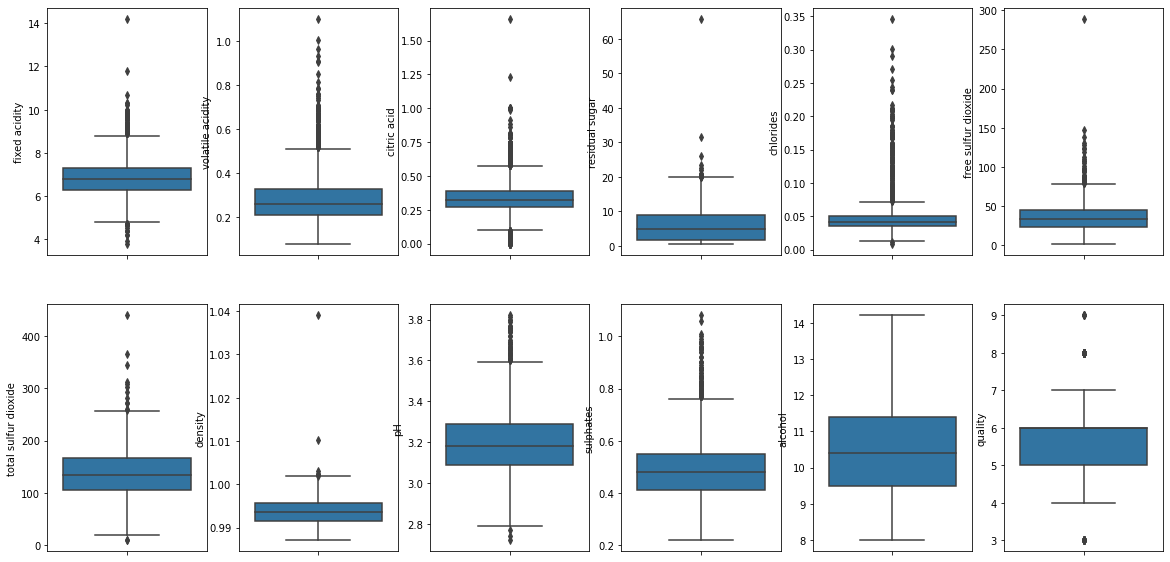

In [166]:
#boxplot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in newWhiteWine.items():
    sns.boxplot(y=col, data=newWhiteWine, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

IndexError: index 12 is out of bounds for axis 0 with size 12

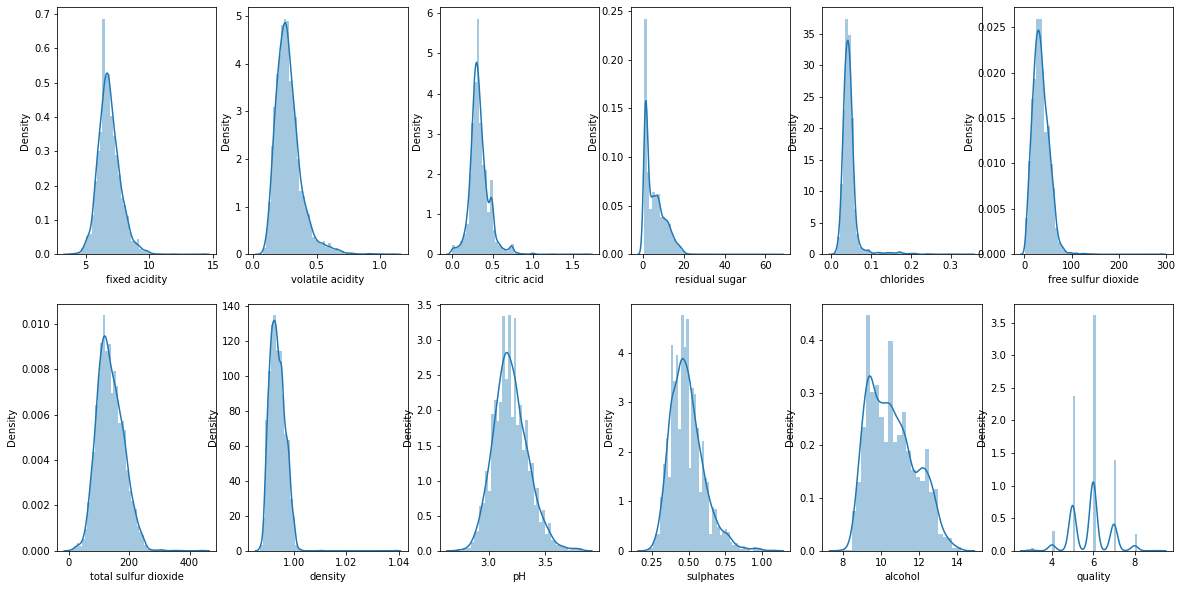

In [167]:
#distribution plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in newWhiteWine.items():
    sns.distplot(value, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Aici putem observa nivelele de calitate a vinurilor. Cea mai mare valoare este 6.

<AxesSubplot:xlabel='quality', ylabel='count'>

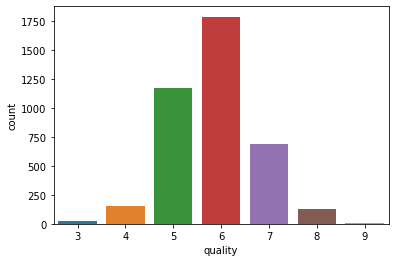

In [169]:
sns.countplot(newWhiteWine['quality'])

In [170]:
newWhiteWine['quality'].describe()

count    3961.000000
mean        5.854835
std         0.890683
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

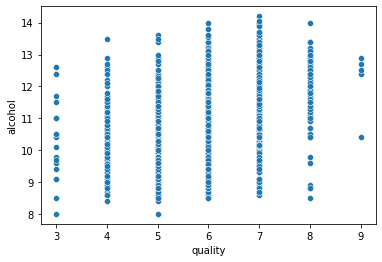

In [171]:
sns.scatterplot(x='quality', y='alcohol', data=newWhiteWine)

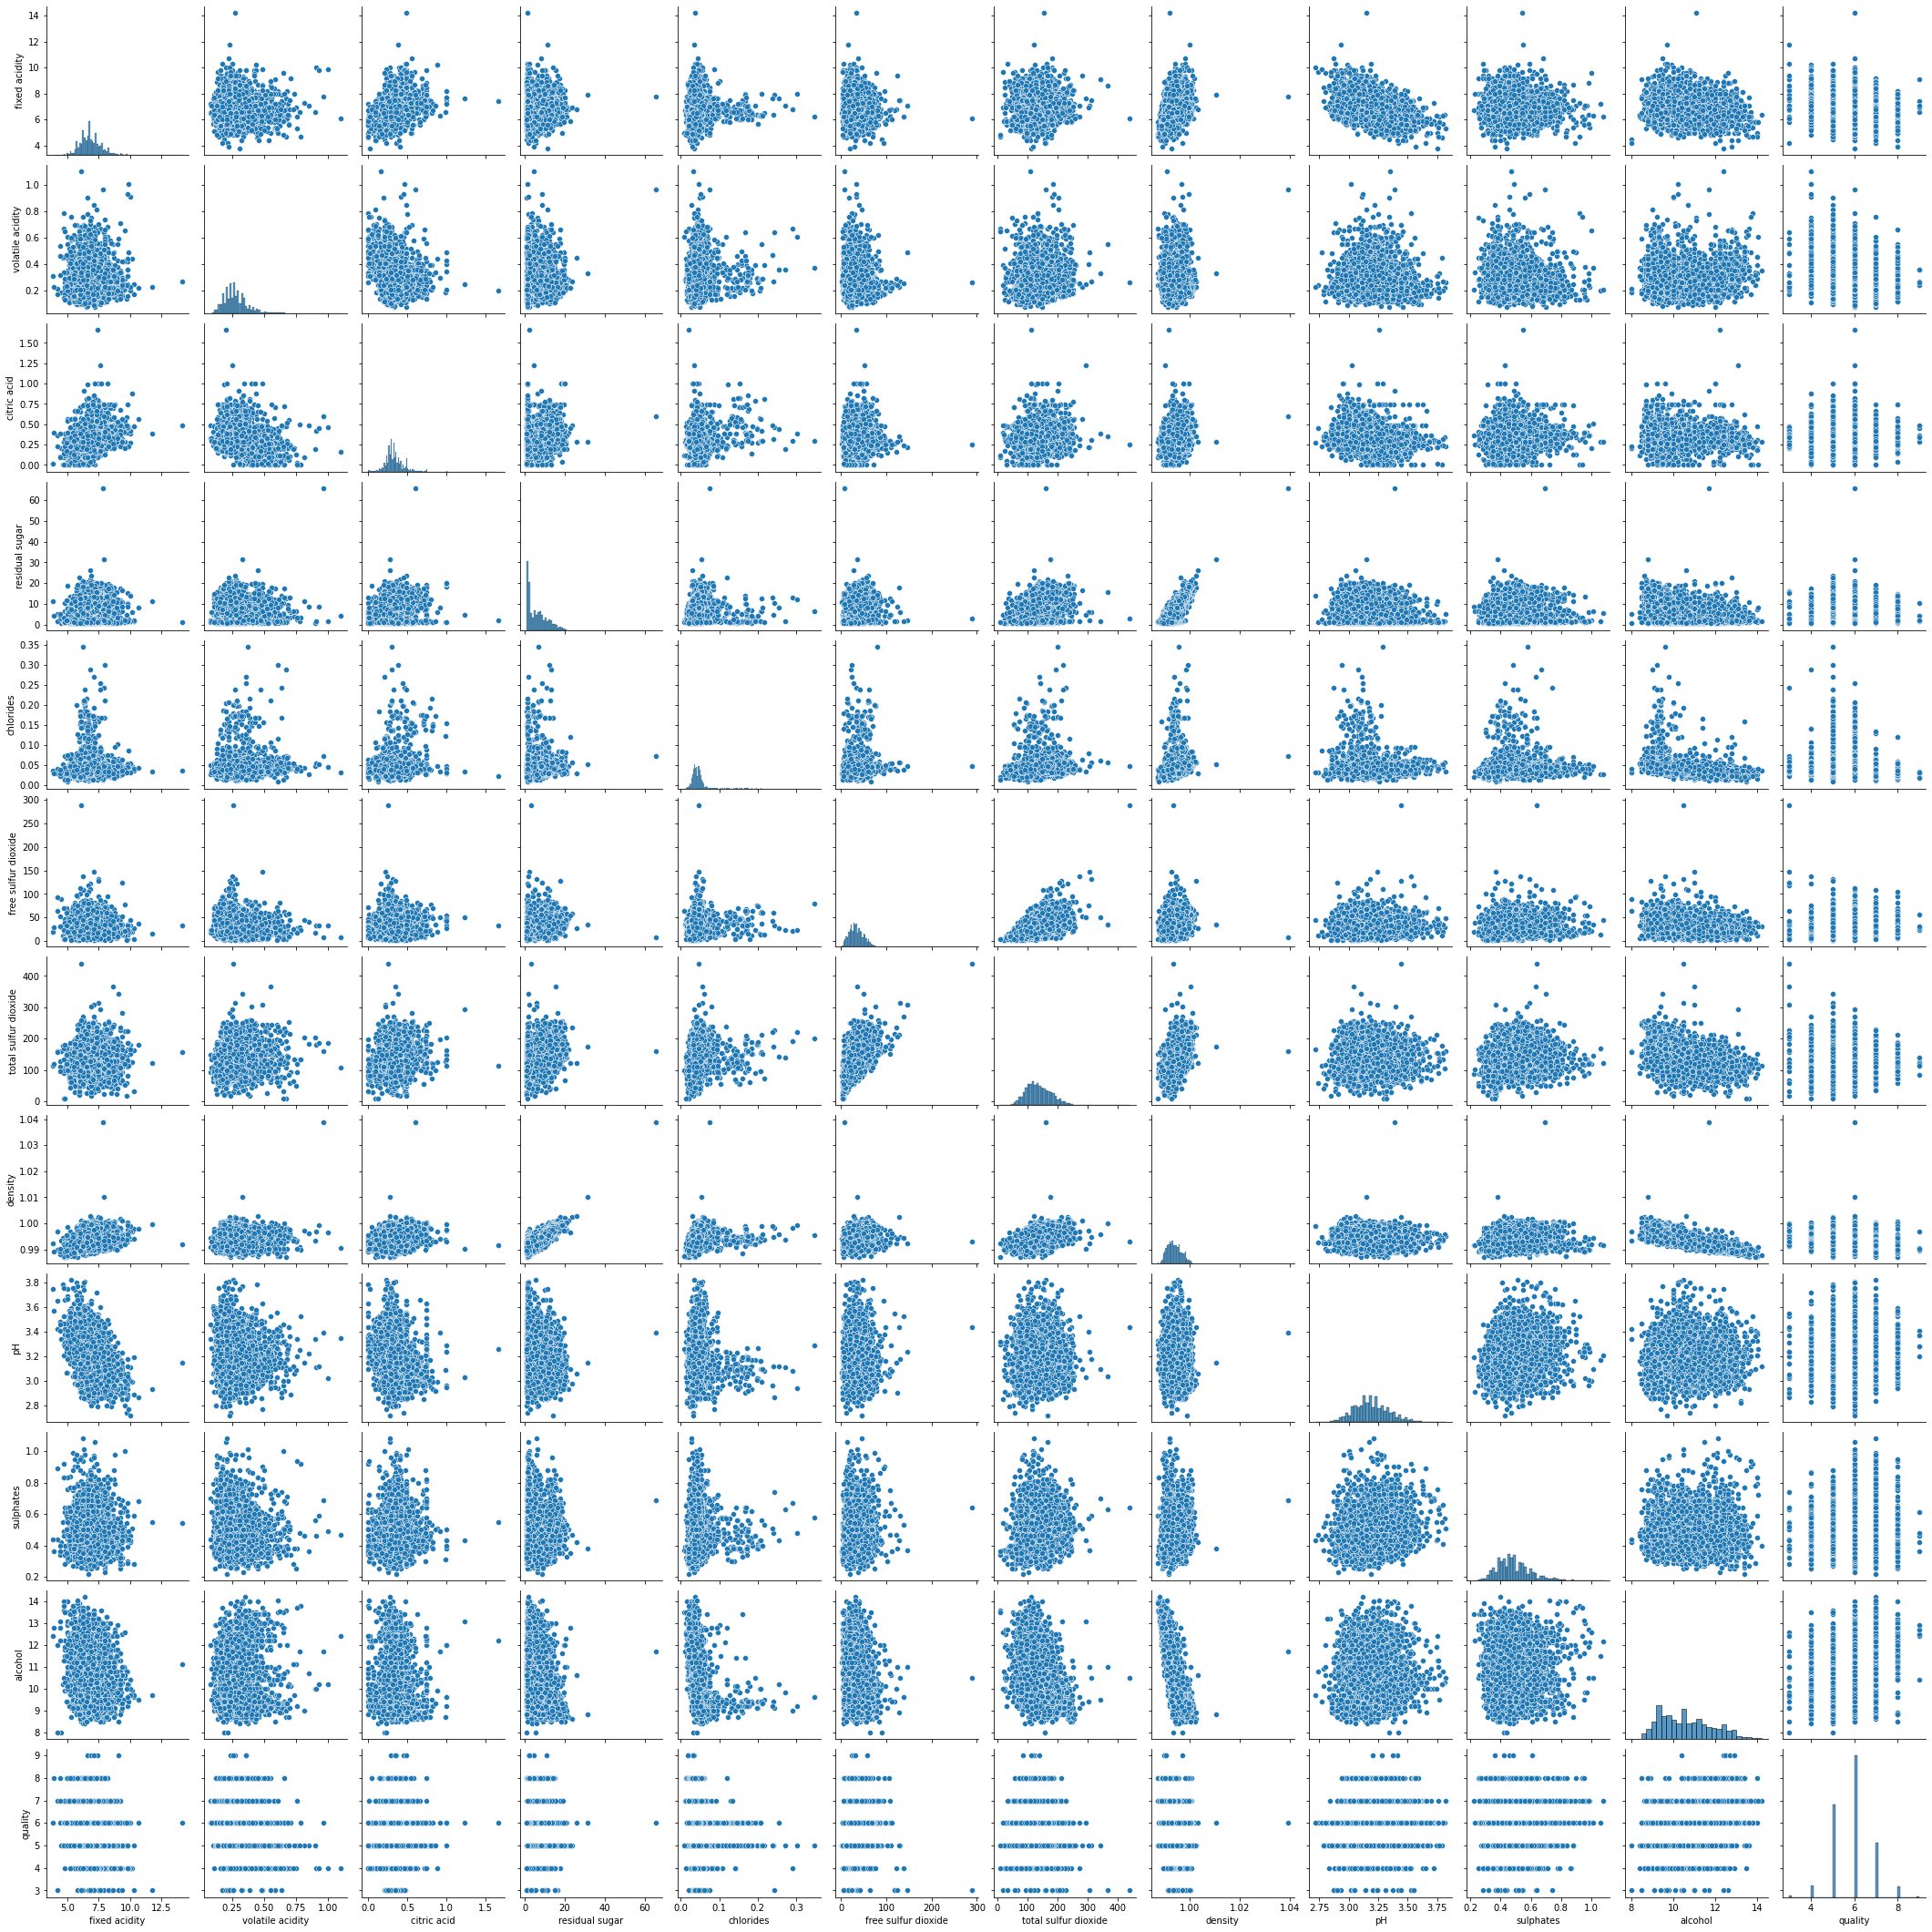

In [173]:
sns.pairplot(newWhiteWine)

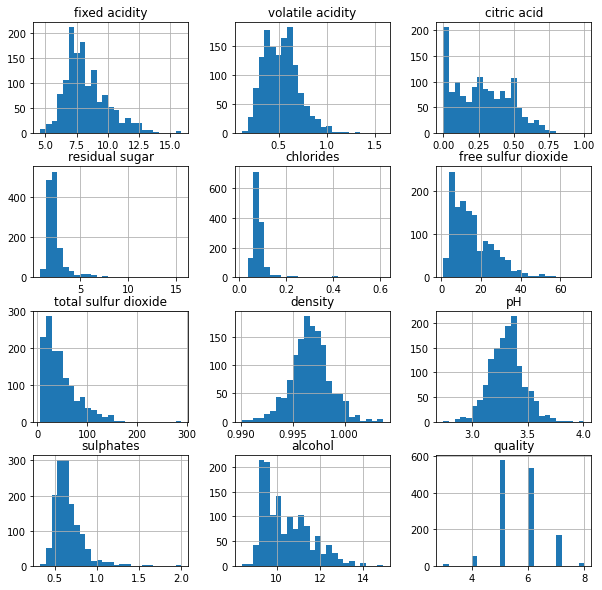

In [174]:
newRedWine.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

# CORRELATION MATRIX FOR THE WHITE WINE

<AxesSubplot:>

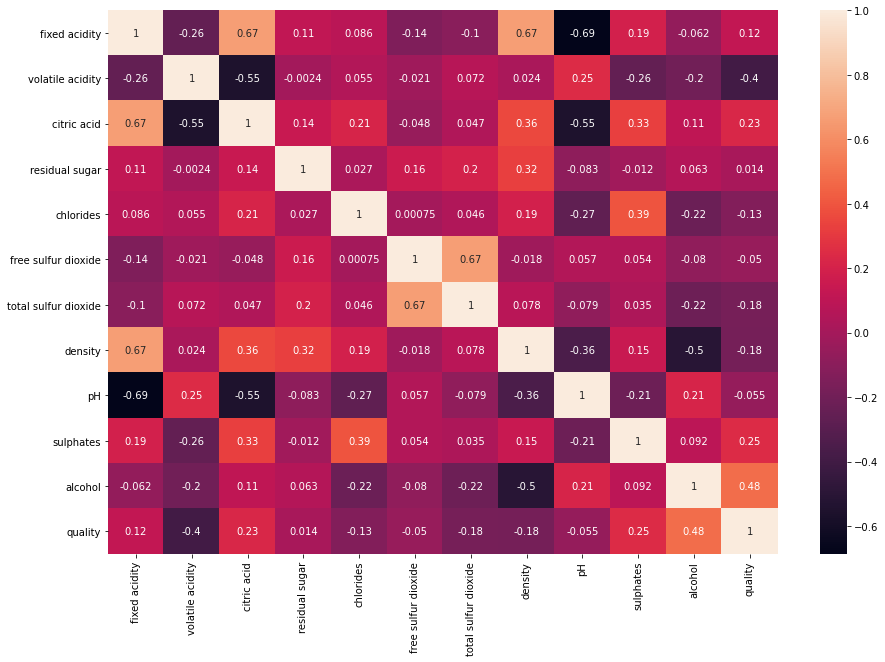

In [175]:
corr = newRedWine.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

# MERGING THE 2 DATASETS

Vom combina aceste 2 seturi de date.

In [180]:
red_white_wine = newRedWine.append(newWhiteWine, ignore_index=False)
red_white_wine.head(5000)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
4520            5.8              0.31         0.31             7.5      0.052   
4521            6.3              0.36         0.20             2.0      0.048   
4523            6.7              0.18         0.25            14.3      0.048   
4524            6.6              0.16         0.25             9.8      0.049   
4526            5.8              0.27         0.22            12.7      0.058   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0   0.9978  3.51       0.56   
1                    25.0                  67.0   0.9968  3.20       0.68   
2                    15.0                  54.0   0.9970  3.26       0.65   
3                    17.0                  60.0   0.9980  3.16       0.58   
5                    13.0                  40.0   0.9978  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4520                 55.0                 230.0   0.9949  3.19       0.46   
4521                 48.0                 191.0   0.9929  3.17       0.51   
4523                 79.0                 149.0   0.9975  3.12       0.37   
4524                 59.5                 137.0   0.9950  3.16       0.38   
4526                 42.0                 206.0   0.9946  3.32       0.38   

      alcohol  quality        Type  
0         9.4        5    Red Wine  
1         9.8        5    Red Wine  
2         9.8        5    Red Wine  
3         9.8        6    Red Wine  
5         9.4        5    Red Wine  
...       ...      ...         ...  
4520      9.8        5  White Wine  
4521      9.6        5  White Wine  
4523      9.7        5  White Wine  
4524     10.0        6  White Wine  
4526     12.3        6  White Wine  

[5000 rows x 13 columns]

In [181]:
red_white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994650   
75%       0.066000            41.000000            153.250000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5320.000000  5320.000000  5320.000000  5320.000000  
mean      3.224664     0.533357    10.549241     5.795677  
std       0.160379     0.149743     1.185933     0.879772  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [182]:
red_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  Type                  5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


In [183]:
red_white_wine.duplicated()

0       False
1       False
2       False
3       False
5       False
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 5320, dtype: bool

In [184]:
newRedWhiteWine = red_white_wine.drop_duplicates()
newRedWhiteWine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  Type                  5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


.shape arata cate randuri avem si cate variable.

In [185]:
newRedWhiteWine.shape

(5320, 13)

# DATA ANALYSIS FOR THE RED&WHITE WINE

IndexError: index 12 is out of bounds for axis 0 with size 12

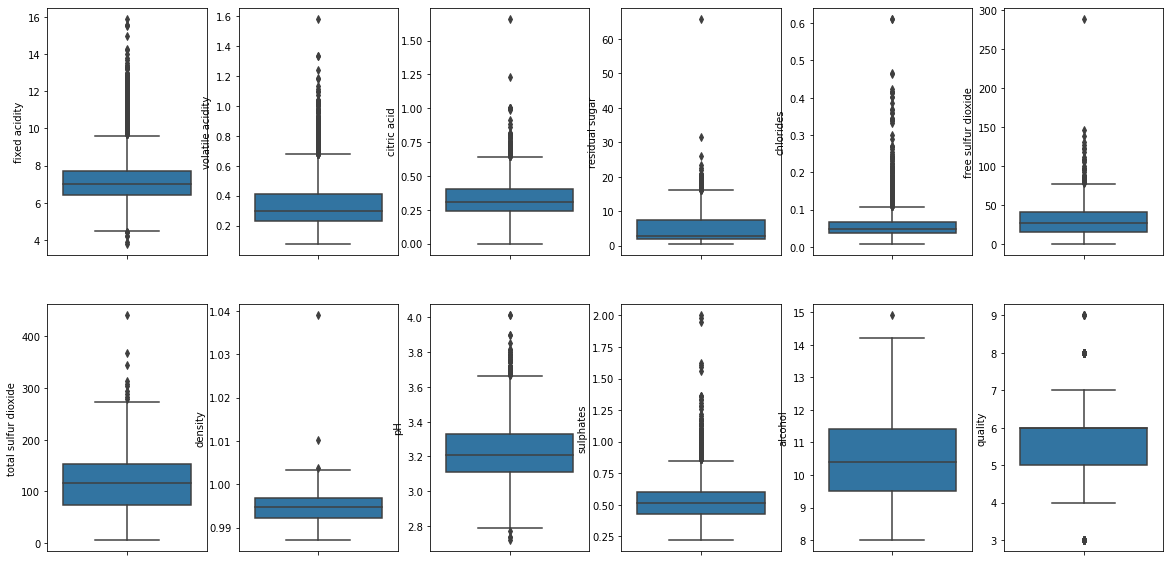

In [187]:
#boxplot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in newRedWhiteWine.items():
    sns.boxplot(y=col, data=newRedWhiteWine, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
#distribution plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in newRedWhiteWine.items():
    sns.distplot(value, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In continuare, majoritatea vinurilor sunt de calitate 6, urmate de calitate 5.

<AxesSubplot:xlabel='quality', ylabel='count'>

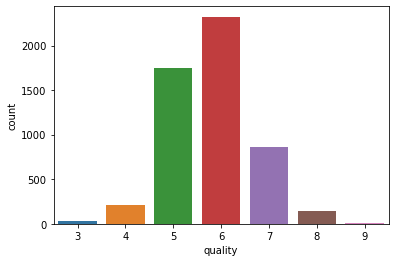

In [189]:
sns.countplot(newRedWhiteWine['quality'])

Putem observa ca sunt mai multe randuri pentru vin alb, decat vin rosu.

<AxesSubplot:xlabel='Type', ylabel='count'>

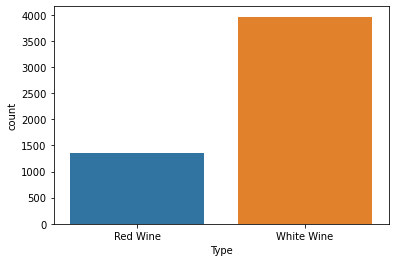

In [191]:
sns.countplot(newRedWhiteWine['Type'])

In [192]:
newRedWhiteWine['quality'].describe()

count    5320.000000
mean        5.795677
std         0.879772
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

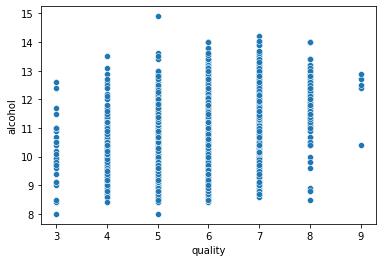

In [193]:
sns.scatterplot(x='quality', y='alcohol', data=newRedWhiteWine)

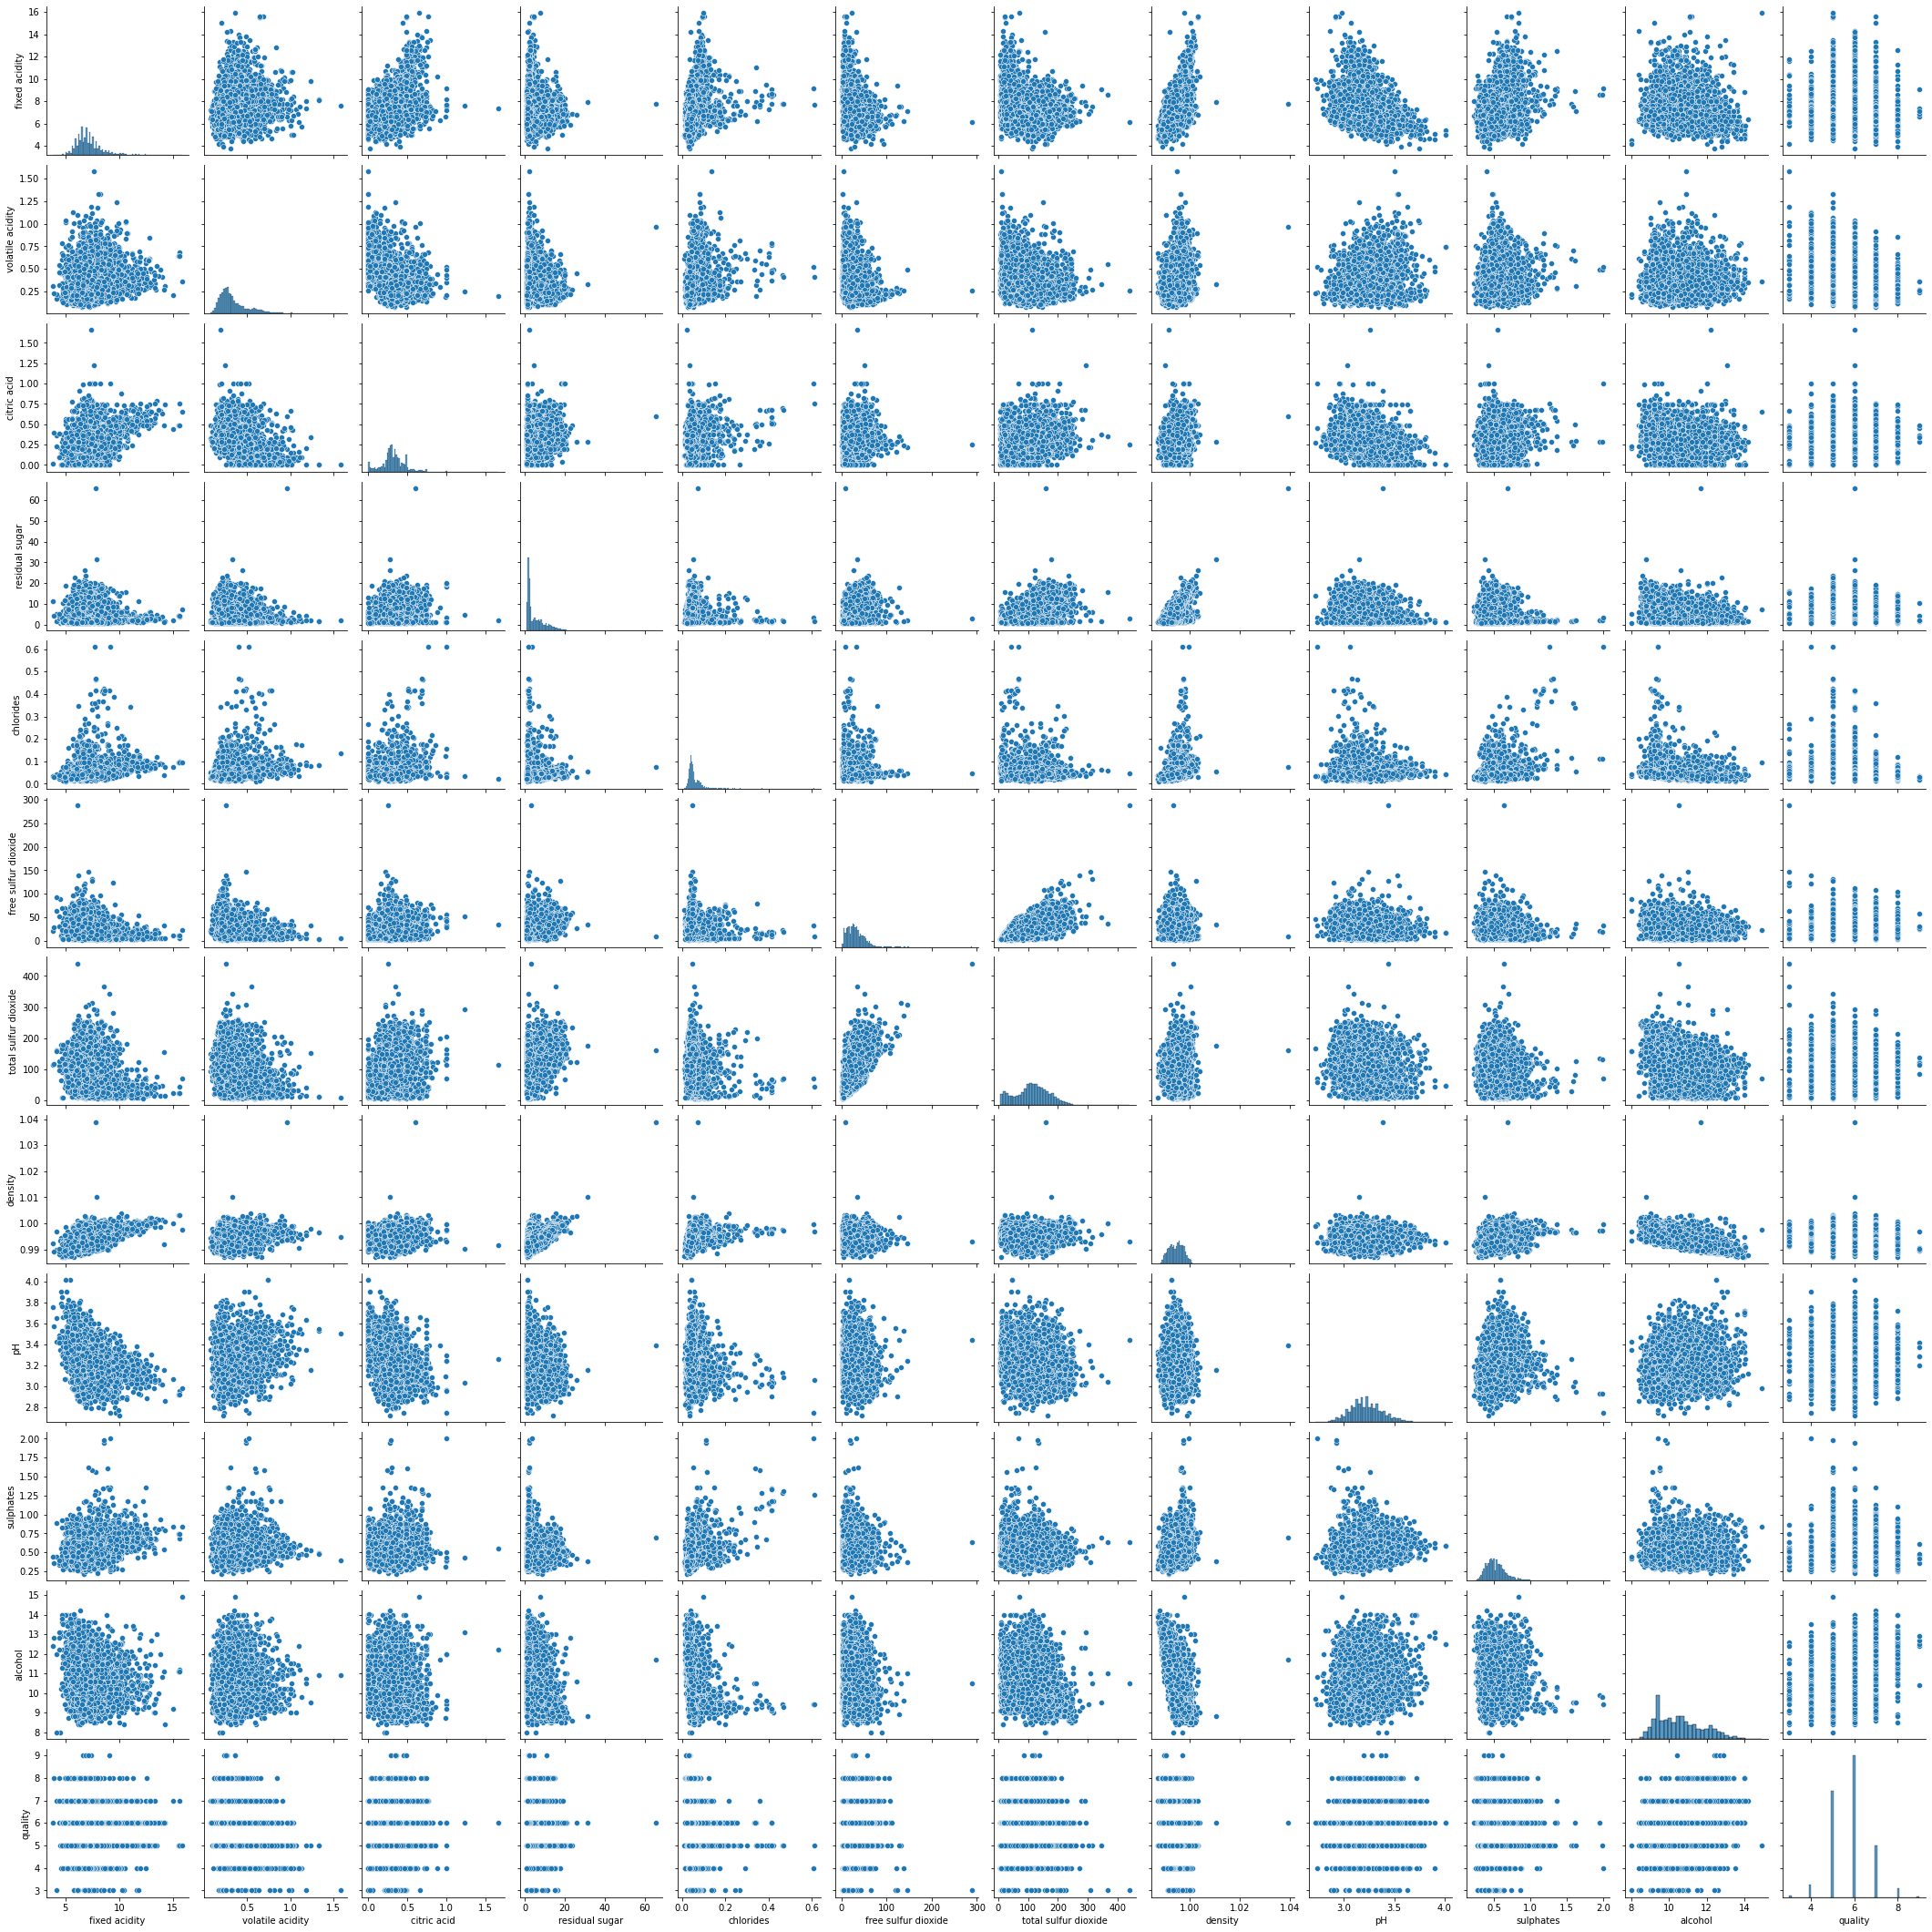

In [194]:
sns.pairplot(newRedWhiteWine)

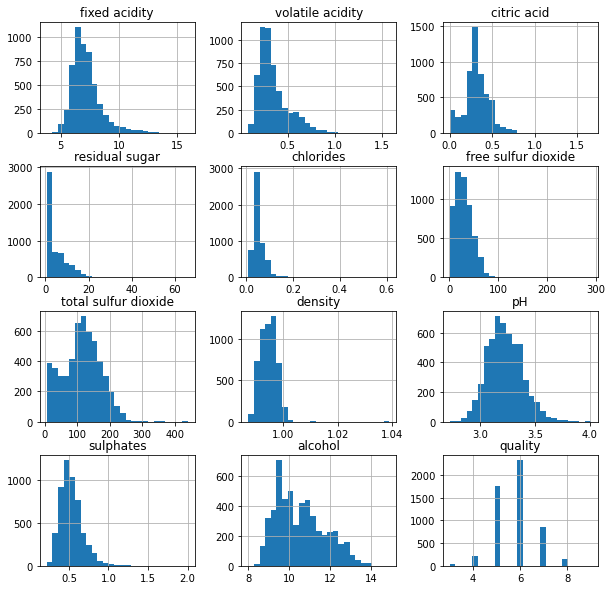

In [195]:
newRedWhiteWine.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

In [196]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(newRedWhiteWine['quality'],finalRedWhiteWine['alcohol'])
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

NameError: name 'finalRedWhiteWine' is not defined

<Figure size 720x432 with 0 Axes>

# CORRELATION MATRIX FOR THE RED&WHITE WINE

<AxesSubplot:>

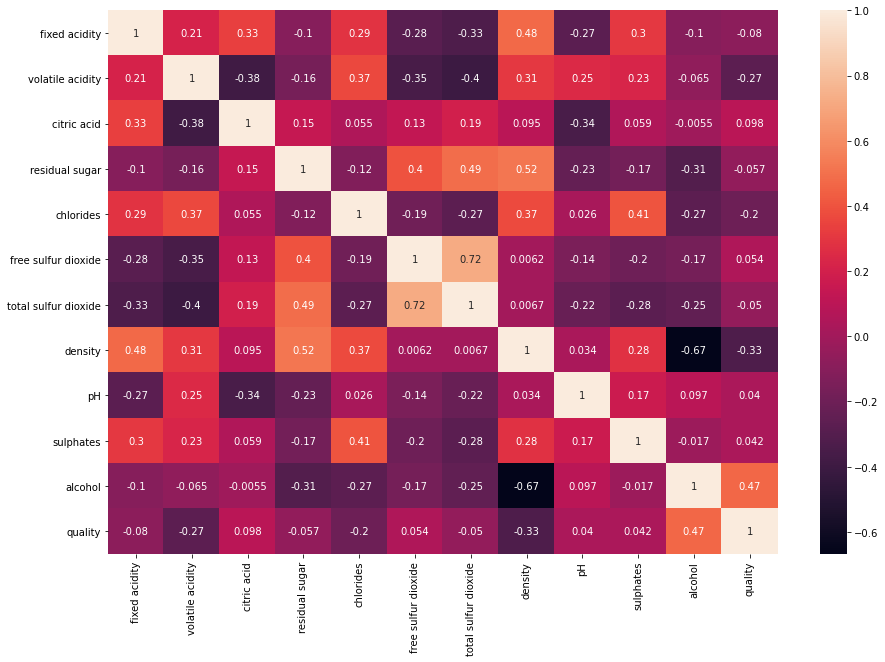

In [197]:
corr = newRedWhiteWine.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

Acum trebuie sa gasim atributele care sunt corelate total de fiecare. Facand acest lucru, reducem numarul de atribute din df.
Trebuie să le renunțăm la cele corelate, deoarece relația dintre ele este egală, influențează în egală măsură acuratețea modelului, așa că ștergem unul dintre ele.
Vedem care sunt variabilele independente(necorelate, foarte putin corelate).


In [199]:
s=newRedWhiteWine['quality']
cut = pd.cut(s,(3,4,6,10),labels=["low","middle","high"])
cut.value_counts()

middle    4075
high      1009
low        206
Name: quality, dtype: int64

Aici scriem un program cu care găsim acele caracteristici al căror număr de corelație este mare, așa cum vedeți în program, am stabilit un număr de corelație mai mare de 0,7 înseamnă că dacă vreo caracteristică are o valoare de corelație mai mare de 0,7 atunci a fost considerată ca fiind complet. In cele din urmă, găsim caracteristica total sulfur dioxide care satisface condiția.

In [200]:
for a in range(len(newRedWhiteWine.corr().columns)):
    for b in range(a):
        if abs(newRedWhiteWine.corr().iloc[a,b]) >0.7:
            name = newRedWhiteWine.corr().columns[a]
            print(name)

total sulfur dioxide


Deci stergem acest atribut.

In [204]:
finalRedWhiteWine=newRedWhiteWine.drop('total sulfur dioxide',axis=1)

In [205]:
finalRedWhiteWine.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
Type                   0
dtype: int64

In [206]:
finalRedWhiteWine.update(finalRedWhiteWine.fillna(finalRedWhiteWine.mean()))

In [207]:
finalRedWhiteWine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity             1.000000          0.214752     0.330328   
volatile acidity          0.214752          1.000000    -0.384192   
citric acid               0.330328         -0.384192     1.000000   
residual sugar           -0.104439         -0.163696     0.146189   
chlorides                 0.288918          0.367626     0.055199   
free sulfur dioxide      -0.281590         -0.349039     0.130849   
density                   0.478180          0.308452     0.094758   
pH                       -0.271182          0.246687    -0.344735   
sulphates                 0.304844          0.227772     0.059183   
alcohol                  -0.102573         -0.065411    -0.005496   
quality                  -0.080092         -0.265205     0.097954   

                     residual sugar  chlorides  free sulfur dioxide   density  \
fixed acidity             -0.104439   0.288918            -0.281590  0.478180   
volatile acidity          -0.163696   0.367626            -0.349039  0.308452   
citric acid                0.146189   0.055199             0.130849  0.094758   
residual sugar             1.000000  -0.123094             0.398717  0.520930   
chlorides                 -0.123094   1.000000            -0.186615  0.371867   
free sulfur dioxide        0.398717  -0.186615             1.000000  0.006166   
density                    0.520930   0.371867             0.006166  1.000000   
pH                        -0.234522   0.025823            -0.141747  0.034273   
sulphates                 -0.174717   0.405051            -0.198244  0.282690   
alcohol                   -0.305242  -0.269601            -0.170012 -0.667811   
quality                   -0.056830  -0.202137             0.054002 -0.326434   

                           pH  sulphates   alcohol   quality  
fixed acidity       -0.271182   0.304844 -0.102573 -0.080092  
volatile acidity     0.246687   0.227772 -0.065411 -0.265205  
citric acid         -0.344735   0.059183 -0.005496  0.097954  
residual sugar      -0.234522  -0.174717 -0.305242 -0.056830  
chlorides            0.025823   0.405051 -0.269601 -0.202137  
free sulfur dioxide -0.141747  -0.198244 -0.170012  0.054002  
density              0.034273   0.282690 -0.667811 -0.326434  
pH                   1.000000   0.168150  0.097314  0.039733  
sulphates            0.168150   1.000000 -0.017232  0.041884  
alcohol              0.097314  -0.017232  1.000000  0.469422  
quality              0.039733   0.041884  0.469422  1.000000

fixed.acidity: positive correlation with citric.acid, density and negative correlation with pH

volatile.acidity: negative correlation with citric.acid

citric.acid: positive correlation with density and negative correlation with fixed.acidity, volatile.acidity, pH

chlorides: positive correlation with sulphates

pH: negative correlation with fixed.acidity, citric.acid, chlorides, density

alcohol: negative correlation with density

density: positive correlation with fixed.acidity, citric.acid, residual.sugar and negative correlation with alcohol

Seems that wines quality depend on the following characteristics:

alcohol;
sulphates;
volatile acidity;
citric acid

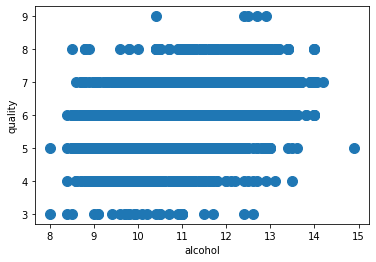

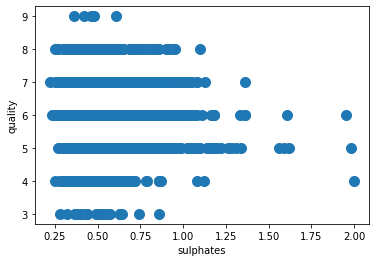

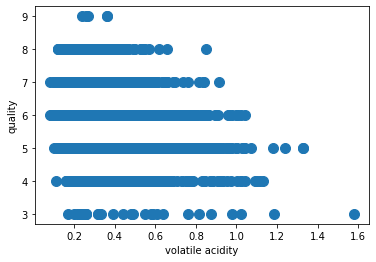

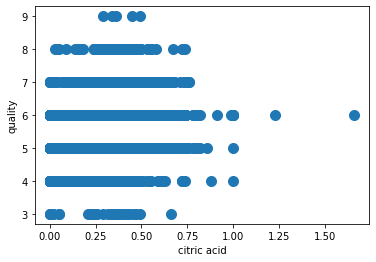

In [208]:
finalRedWhiteWine.plot.scatter(x = 'alcohol', y = 'quality', s = 100);
finalRedWhiteWine.plot.scatter(x = 'sulphates', y = 'quality', s = 100);
finalRedWhiteWine.plot.scatter(x = 'volatile acidity', y = 'quality', s = 100);
finalRedWhiteWine.plot.scatter(x = 'citric acid', y = 'quality', s = 100);

.value_counts() - numaram cate randuri au calitate de la 3 la 9.

In [211]:
finalRedWhiteWine.quality.value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

Metoda .get_dummies convertește datele categoriale in variabile dummy(fictive) sau indicator.
Astfel, coloana Type se modifica, astfel incat vinul rosu are valoarea 0, iar cel alb are valoarea 1.

In [213]:
# catogerical vars 
dummy = pd.get_dummies(finalRedWhiteWine,drop_first=True)
# display new dataframe
dummy

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
0                    11.0  0.99780  3.51       0.56      9.4        5   
1                    25.0  0.99680  3.20       0.68      9.8        5   
2                    15.0  0.99700  3.26       0.65      9.8        5   
3                    17.0  0.99800  3.16       0.58      9.8        6   
5                    13.0  0.99780  3.51       0.56      9.4        5   
...                   ...      ...   ...        ...      ...      ...   
4893                 24.0  0.99114  3.27       0.50     11.2        6   
4894                 57.0  0.99490  3.15       0.46      9.6        5   
4895                 30.0  0.99254  2.99       0.46      9.4        6   
4896                 20.0  0.98869  3.34       0.38     12.8        7   
4897                 22.0  0.98941  3.26       0.32     11.8        6   

      Type_White Wine  
0                   0  
1                   0  
2                   0  
3                   0  
5                   0  
...               ...  
4893                1  
4894                1  
4895                1  
4896                1  
4897                1  

[5320 rows x 12 columns]

Utilizam dummy pentru a adauga inca 3 coloane, pentru a afisa cea mai buna, medie si scazuta calitate a vinului.

In [271]:
dummy["best quality"] = [ 1 if x>=7 else 0 for x in finalRedWhiteWine.quality] 
dummy["medium quality"] = [ 1 if x>=5 and x<=6 else 0 for x in finalRedWhiteWine.quality]
dummy["bad quality"] = [ 1 if x<=4 else 0 for x in finalRedWhiteWine.quality]
dummy.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
0                 11.0   0.9978  3.51       0.56      9.4        5   
1                 25.0   0.9968  3.20       0.68      9.8        5   
2                 15.0   0.9970  3.26       0.65      9.8        5   
3                 17.0   0.9980  3.16       0.58      9.8        6   
5                 13.0   0.9978  3.51       0.56      9.4        5   

   Type_White Wine  best quality  medium quality  bad quality  
0                0             0               1            0  
1                0             0               1            0  
2                0             0               1            0  
3                0             0               1            0  
5                0             0               1            0

Random Decision Forest este un algoritm de învățare automată supravegheat utilizat pentru clasificare, regresie și alte sarcini folosind arbori de decizie.
Clasificatorul de pădure aleatoriu creează un set de arbori de decizie dintr-un subset selectat aleatoriu al setului de antrenament. Este practic un set de arbori de decizie dintr-un subset selectat aleatoriu al setului de antrenament și apoi colectează voturile din arbori de decizie diferiți pentru a decide predicția finală.

In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

Multicoliniaritatea apare în cea mai mare parte într-un model de regresie atunci când două sau mai multe variabile independente sunt foarte corelate una cu cealaltă.

Factorul de inflație a varianței (VIF) poate fi utilizat pentru a verifica multicoliniaritatea.

VIF începe la 1 și nu are limite. VIF = 1, nicio corelație între variabilele independente. VIF > 10 multicoliniaritate mare între variabile independente.

In [338]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [339]:
def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return(vif)

In [340]:
x=finalRedWhiteWine.iloc[:,:-1]
calc_VIF(x)

variables         VIF
0         fixed acidity   53.678882
1      volatile acidity    9.276939
2           citric acid    9.114842
3        residual sugar    3.208800
4             chlorides    5.155257
5   free sulfur dioxide    5.490415
6               density  850.335755
7                    pH  579.807008
8             sulphates   18.749924
9               alcohol  126.074861
10              quality   63.197780

In [341]:
X = dummy.drop('quality', axis = 1)
y = dummy['quality']

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [343]:
sc = StandardScaler()

In [344]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

ACCURACY_SCORE - In clasificarea cu mai multe etichete, această funcție calculează acuratețea subsetului: setul de etichete prezis pentru un eșantion trebuie să se potrivească exact cu setul corespunzător de etichete în y_true.

Valorile MSE, MAE, RMSE și R-Squared sunt utilizate în principal pentru a evalua ratele de eroare de predicție și performanța modelului în analiza de regresie.

MSE (Mean Squared Error) reprezintă diferența dintre valorile inițiale și cele prezise extrase prin diferența medie la pătrat pe setul de date.

RMSE (Root Mean Squared Error) este rata de eroare după rădăcina pătrată a MSE.

R-pătrat (Coeficientul de determinare) reprezintă coeficientul cât de bine se potrivesc valorile în comparație cu valorile originale. Valoarea de la 0 la 1 interpretată ca procente. Cu cât valoarea este mai mare, cu atât modelul este mai bun.

In [345]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
accuracy_score(y_test, pred_rfc)
# predicting score
rnd_score = rfc.score(X_train, y_train)
print('score of model is : ',rnd_score)
# calculating mean squared error
rnd_MSE = np.square(np.subtract(y_test,pred_rfc)).mean()
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)


score of model is :  1.0
mean squared error is :  0.24906015037593984
root mean squared error is :  0.49905926539434153


Putem observa ca scorul modelului este 1.0.
Funcția accuracy_score calculează acuratețea, fie numărul predicțiilor corecte.

În clasificarea cu mai multe etichete, funcția returnează acuratețea subsetului. Dacă întregul set de etichete prezise pentru o probă se potrivește strict cu setul adevărat de etichete, atunci precizia subsetului este 1.0.

In [346]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Un raport de clasificare este o măsurătoare de evaluare a performanței în învățarea automată. Este folosit pentru a arăta precizia, reamintirea, scorul F1 și suportul modelului de clasificare antrenat.

Precizia este definită ca raportul dintre pozitive adevărate și suma pozitive adevărate și false pozitive.

Recall este definit ca raportul dintre adevăratele pozitive și suma dintre adevăratele pozitive și falsele negative.

Scor F1 este media armonică ponderată a preciziei și a reamintirii. Cu cât valoarea scorului F1 este mai aproape de 1,0, cu atât performanța așteptată a modelului este mai bună.

Support este numărul de apariții reale ale clasei din setul de date. Nu variază între modele, ci doar diagnosticează procesul de evaluare a performanței.

Putem observa ca in raportul de clasificare, acuratetea este de 0.75.

In [347]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.90      1.00      0.95        38
           5       0.67      0.66      0.67       348
           6       0.75      0.76      0.75       458
           7       0.88      0.99      0.93       190
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00         1

    accuracy                           0.75      1064
   macro avg       0.46      0.49      0.47      1064
weighted avg       0.73      0.75      0.74      1064



In acest tabel aratam valorile prezise de modelul nostru vs valorile originale.

In [348]:
predicted_df = {'predicted_values': pred_rfc, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

predicted_values  original_values
622                  6                6
4568                 6                6
2901                 7                7
3452                 6                5
639                  6                6
4631                 7                7
610                  5                5
4006                 6                6
380                  6                6
1468                 6                5
3499                 7                7
1497                 7                7
1595                 5                6
1816                 7                7
1524                 5                6
2183                 5                5
3695                 6                6
3943                 6                6
2777                 6                6
85                   6                5

CONFUSION MATRIX este un rezumat al rezultatelor predicției pentru o problemă de clasificare. Numărul de predicții corecte și incorecte este rezumat cu valori de numărare și defalcat pe fiecare clasă. Aceasta este cheia matricei de confuzie.


CONFUSION MATRIX


<AxesSubplot:>

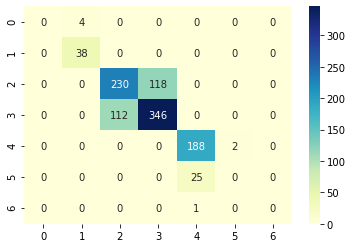

In [349]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,pred_rfc)


print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

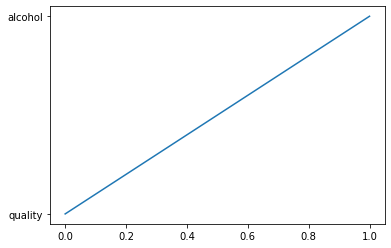

In [350]:
plt.plot(['quality','alcohol'])
plt.show()

In [364]:
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(dummy,open(file,'wb'))
print("The model has been saved")


The model has been saved
